In [1]:
# importing neccessary packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',300)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from keras import layers,Input, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [5]:
import os
os.listdir('../input')

['train.csv', 'test.csv', 'sample_submission.csv']

In [6]:
root = '../input/'

In [7]:
print('Reading data...')
data_train = pd.read_csv(root+'train.csv')
print('Train data loaded.')
data_test = pd.read_csv(root+'test.csv')
print('Test data loaded.')

Reading data...
Train data loaded.
Test data loaded.


In [8]:
print('No. of columns:', len(data_train.columns))

No. of columns: 258


In [9]:
print('Train Shape:', data_train.shape)
print('Test Shape:', data_test.shape)

Train Shape: (262144, 258)
Test Shape: (131073, 257)


In [10]:
data_train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

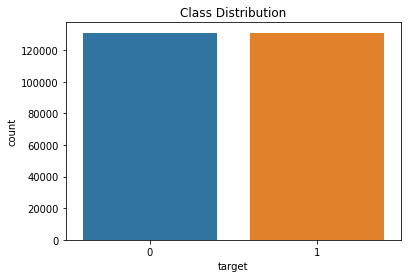

In [11]:
sns.countplot(data_train.target)
plt.title('Class Distribution')
plt.show()

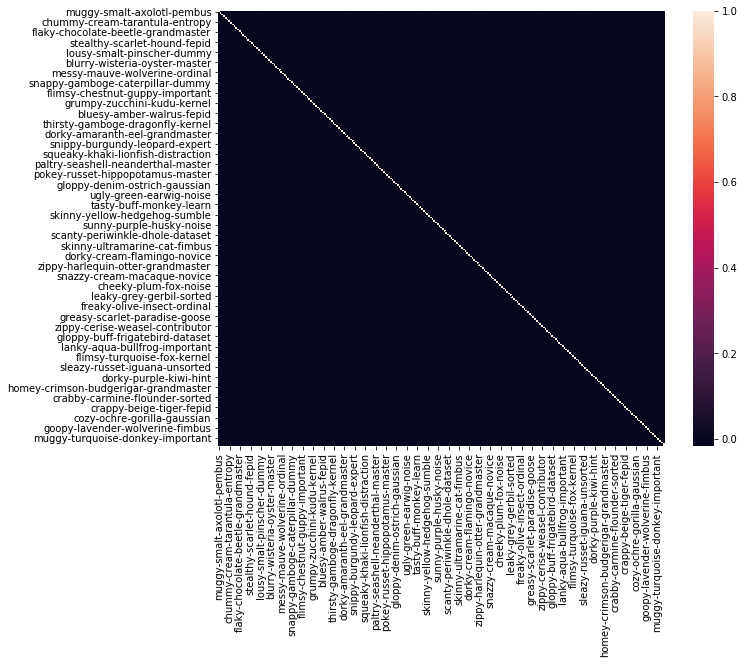

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_train.corr())

In [13]:
# Unique value Percent
def uni_val_percent(data=data_train,
                    thresh=0.971):
    '''
    Unique Value Percentage above the threshold
    '''
    num_values = data.shape[0]
    all_percent = []
    for col in data.drop(['id','target'], axis=1).columns:
        percent = data_train[col].nunique()/num_values
        if percent>thresh:
            print('--- '+str(col)+' ---')
            print('Unique value Percentage: %.5f'\
                    %(percent))
            
            print()
        all_percent.append([col, percent])
    return all_percent

In [14]:
all_percent = uni_val_percent()

--- dorky-peach-sheepdog-ordinal ---
Unique value Percentage: 0.97118

--- snazzy-harlequin-chicken-distraction ---
Unique value Percentage: 0.97113

--- nerdy-indigo-wolfhound-sorted ---
Unique value Percentage: 0.97180

--- lousy-plum-penguin-sumble ---
Unique value Percentage: 0.97105

--- stealthy-scarlet-hound-fepid ---
Unique value Percentage: 0.97102

--- goopy-eggplant-indri-entropy ---
Unique value Percentage: 0.97119

--- homey-sepia-bombay-sorted ---
Unique value Percentage: 0.97125

--- blurry-wisteria-oyster-master ---
Unique value Percentage: 0.97138

--- messy-mauve-wolverine-ordinal ---
Unique value Percentage: 0.97152

--- beady-aquamarine-affenpinscher-grandmaster ---
Unique value Percentage: 0.97108

--- pasty-auburn-rat-entropy ---
Unique value Percentage: 0.97115

--- sunny-red-weasel-hint ---
Unique value Percentage: 0.97121

--- wiggy-magnolia-wolfhound-sorted ---
Unique value Percentage: 0.97106

--- flimsy-chestnut-guppy-important ---
Unique value Percentage: 0

In [15]:
print('Class Count:')
print(data_train.target.value_counts())

Class Count:
1    131131
0    131013
Name: target, dtype: int64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


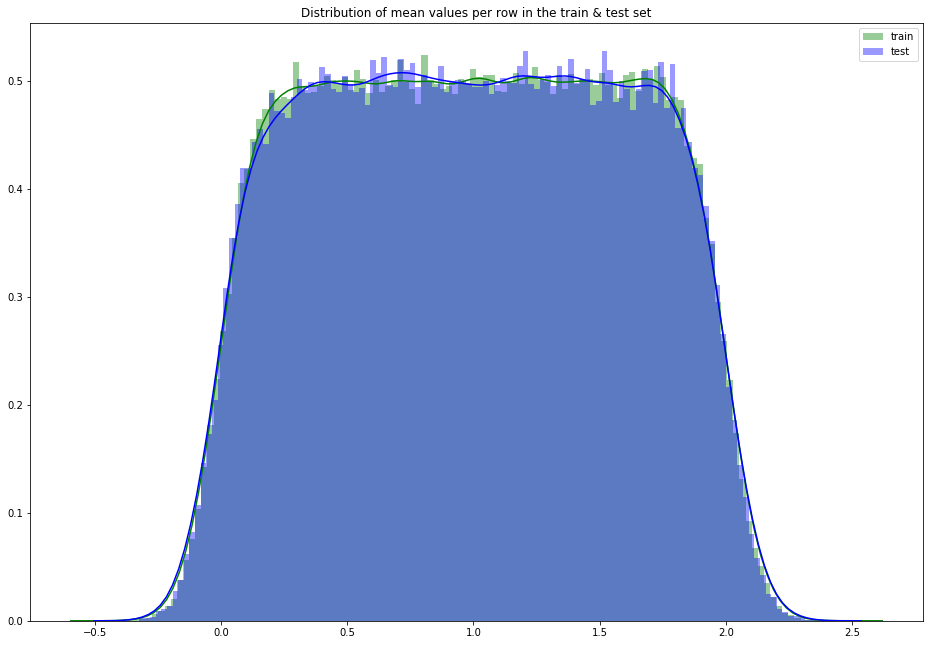

In [16]:
# distribution of mean
plt.figure(figsize=(16, 11))
feat = data_train.drop(['id', 'target'], axis=1).columns.values
plt.title("Distribution of mean values per row in the train & test set")
sns.distplot(data_train[feat].mean(axis=1), color='green', 
             kde=True, bins=120, label='train')
sns.distplot(data_test[feat].mean(axis=1), color='blue', 
             kde=True, bins=120, label='test')
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


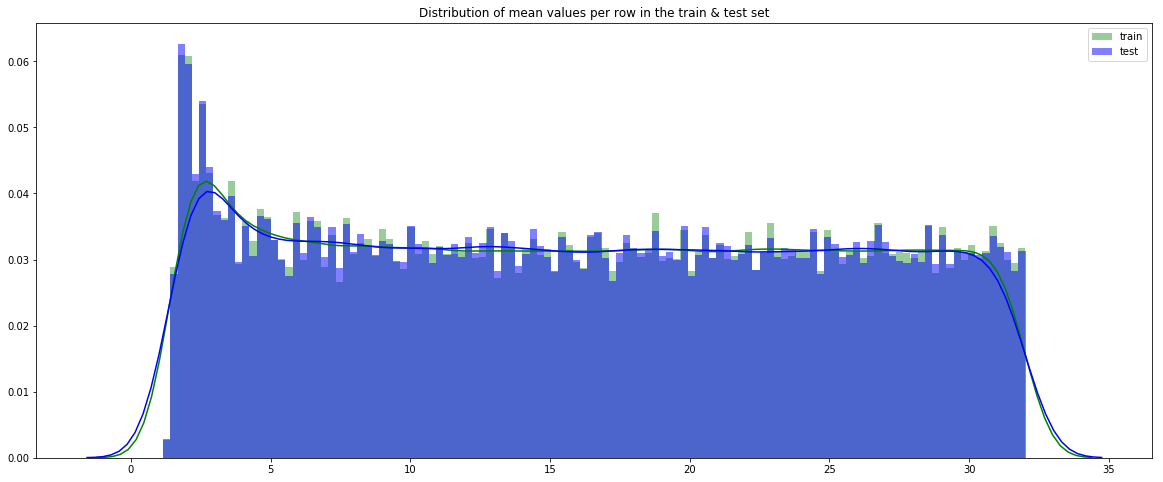

In [17]:
# distribution of std
plt.figure(figsize=(20, 8))
feat = data_train.drop(['id', 'target'], axis=1).columns.values
plt.title("Distribution of mean values per row in the train & test set")
sns.distplot(data_train[feat].std(axis=1), color='green', 
             kde=True, bins=120, label='train')
sns.distplot(data_test[feat].std(axis=1), color='blue', 
             kde=True, bins=120, label='test', hist_kws=dict(alpha=0.5))
plt.legend()
plt.show()

In [18]:
# understanding the correlation between the columns
correlations = data_train[feat].corr().abs().unstack()\
            .sort_values(kind='quicksort').reset_index()

In [19]:
correlations = correlations[correlations['level_0']!=correlations['level_1']]

In [20]:
correlations.head(10)

,level_0,level_1,0
0,flimsy-turquoise-fox-kernel,homely-ruby-bulldog-entropy,1.743314e-08
1,homely-ruby-bulldog-entropy,flimsy-turquoise-fox-kernel,1.743314e-08
2,flaky-crimson-wallaby-distraction,leaky-grey-gerbil-sorted,4.006599e-08
3,leaky-grey-gerbil-sorted,flaky-crimson-wallaby-distraction,4.006599e-08
4,stinky-maroon-blue-kernel,leaky-amaranth-lizard-sorted,4.644567e-08
5,leaky-amaranth-lizard-sorted,stinky-maroon-blue-kernel,4.644567e-08
6,lanky-coral-moorhen-expert,leaky-grey-gerbil-sorted,7.148392e-08
7,leaky-grey-gerbil-sorted,lanky-coral-moorhen-expert,7.148392e-08
8,breezy-persimmon-newt-noise,slimy-plum-cassowary-master,1.683237e-07
9,slimy-plum-cassowary-master,breezy-persimmon-newt-noise,1.683237e-07


In [21]:
correlations.tail(10)

,level_0,level_1,0
65270,skanky-cobalt-dolphin-sorted,beady-mauve-frog-distraction,0.012648
65271,beady-mauve-frog-distraction,skanky-cobalt-dolphin-sorted,0.012648
65272,shaggy-silver-indri-fimbus,skimpy-chocolate-dog-learn,0.013359
65273,skimpy-chocolate-dog-learn,shaggy-silver-indri-fimbus,0.013359
65274,zippy-cerise-weasel-contributor,snoopy-red-zonkey-unsorted,0.014360
65275,snoopy-red-zonkey-unsorted,zippy-cerise-weasel-contributor,0.014360
65276,squirrely-apricot-goat-hint,wheezy-copper-turtle-magic,0.014700
65277,wheezy-copper-turtle-magic,squirrely-apricot-goat-hint,0.014700
65278,wheezy-copper-turtle-magic,trippy-asparagus-bison-expert,0.015849
65279,trippy-asparagus-bison-expert,wheezy-copper-turtle-magic,0.015849


In [22]:
scaler = StandardScaler()
train_scaled_x = scaler.fit_transform(data_train.drop(['id','target'],
                                                    axis=1))
test_scaled_x = scaler.transform(data_test.drop(['id'],
                                              axis=1))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [23]:
train_y = data_train.target

In [24]:
# splitting train-test
train_x, valid_x, train_y, valid_y = \
                train_test_split(train_scaled_x,
                train_y, random_state=33,
                test_size=0.15)

In [25]:
def base_model():
    model_name = 'base_model'
    inp = Input(shape=(train_x.shape[1],), name='input')
    x = layers.Dense(750, activation='relu')(inp)
    x = layers.Dropout(0.6)(x)
    
    x = layers.Dense(500, activation='relu')(x)
    x = layers.Dropout(0.55)(x)
    
    x = layers.Dense(500, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1, activation='sigmoid')(x)
    
    model = Model(inp, x)
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model_name, model

In [26]:
def deep_model_0():
    model_name = 'deep_model_0'
    inp = Input(shape=(train_x.shape[1],), name='input')
    x = layers.Dense(1024, activation='relu')(inp)
    x = layers.Dropout(0.6)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.55)(x)
    
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    
    x = layers.Dense(1, activation='sigmoid')(x)
    
    model = Model(inp, x)
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model_name, model

In [27]:
# loading model
model_name, model = deep_model_0()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)      

In [31]:
weights_path = model_name+'weights.best.hdf5'
val_loss_checkpoint = ModelCheckpoint(
                    weights_path, monitor='val_acc',
                    verbose=1, save_best_only=True, mode='max')

In [32]:
# simple early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

In [33]:
history = model.fit(train_x, train_y, epochs=400,
          validation_data=(valid_x, valid_y),
         callbacks=[val_loss_checkpoint, early_stop], batch_size=512,
         verbose=1)

Train on 222822 samples, validate on 39322 samples
Epoch 1/400
222822/222822 [==============================] - 2s 10us/step - loss: 0.6934 - acc: 0.5042 - val_loss: 0.6926 - val_acc: 0.5202

Epoch 00001: val_acc improved from -inf to 0.52017, saving model to deep_model_0weights.best.hdf5
Epoch 2/400
222822/222822 [==============================] - 2s 9us/step - loss: 0.6923 - acc: 0.5186 - val_loss: 0.6927 - val_acc: 0.5164

Epoch 00002: val_acc did not improve from 0.52017
Epoch 3/400
222822/222822 [==============================] - 2s 9us/step - loss: 0.6908 - acc: 0.5301 - val_loss: 0.6903 - val_acc: 0.5317

Epoch 00003: val_acc improved from 0.52017 to 0.53166, saving model to deep_model_0weights.best.hdf5
Epoch 4/400
222822/222822 [==============================] - 2s 9us/step - loss: 0.6890 - acc: 0.5397 - val_loss: 0.6892 - val_acc: 0.5368

Epoch 00004: val_acc improved from 0.53166 to 0.53680, saving model to deep_model_0weights.best.hdf5
Epoch 5/400
222822/222822 [===========


Epoch 00038: val_acc did not improve from 0.59120
Epoch 39/400
222822/222822 [==============================] - 2s 10us/step - loss: 0.5970 - acc: 0.6818 - val_loss: 0.6699 - val_acc: 0.5910

Epoch 00039: val_acc did not improve from 0.59120
Epoch 40/400
222822/222822 [==============================] - 2s 10us/step - loss: 0.5943 - acc: 0.6832 - val_loss: 0.6689 - val_acc: 0.5901

Epoch 00040: val_acc did not improve from 0.59120
Epoch 41/400
222822/222822 [==============================] - 2s 10us/step - loss: 0.5928 - acc: 0.6839 - val_loss: 0.6671 - val_acc: 0.5923

Epoch 00041: val_acc improved from 0.59120 to 0.59231, saving model to deep_model_0weights.best.hdf5
Epoch 42/400
222822/222822 [==============================] - 2s 10us/step - loss: 0.5928 - acc: 0.6843 - val_loss: 0.6752 - val_acc: 0.5918

Epoch 00042: val_acc did not improve from 0.59231
Epoch 43/400
222822/222822 [==============================] - 2s 11us/step - loss: 0.5923 - acc: 0.6851 - val_loss: 0.6679 - val_a

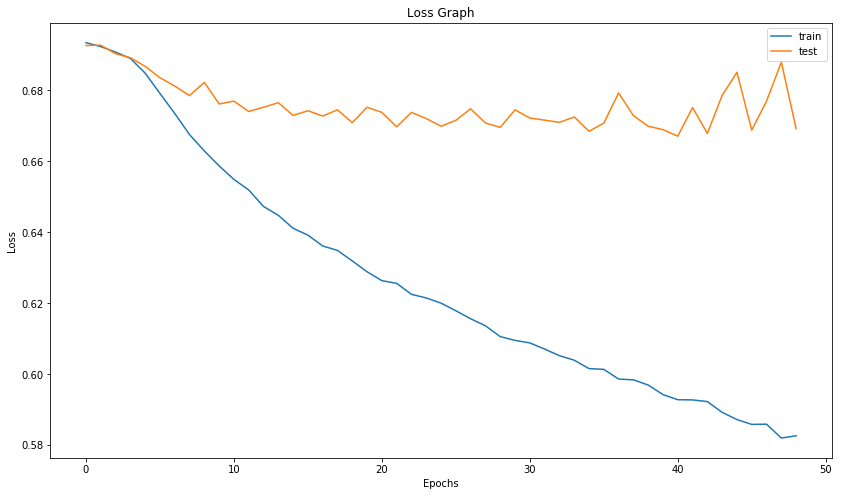

In [34]:
# plot training history
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig(model_name+'_loss.png')
plt.show()


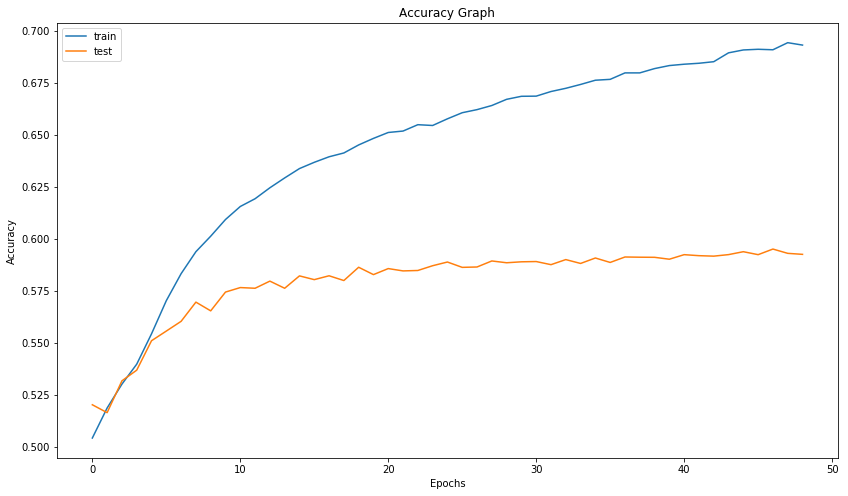

In [35]:
# plot training history
plt.figure(figsize=(14, 8))
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig(model_name+'_acc.png')
plt.show()

In [36]:
# predicting for test data
pred = model.predict(data_test.drop(['id'], axis=1))
submission_file = pd.DataFrame(pred, columns=['target'])
submission_file['id'] = data_test.id

In [38]:
submission_file.to_csv(model_name+'.csv')